## Import potrzebnych bibliotek

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Import danych

In [3]:
mp = pd.read_csv('mobile-price-classification_train.csv')

In [4]:
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Pokazanie podstawowych metryk o danych

In [5]:
mp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
mp.shape

(2000, 21)

In [7]:
mp.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
mp.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Zbadanie koleracji pomiędzy zmiennymi

<AxesSubplot:>

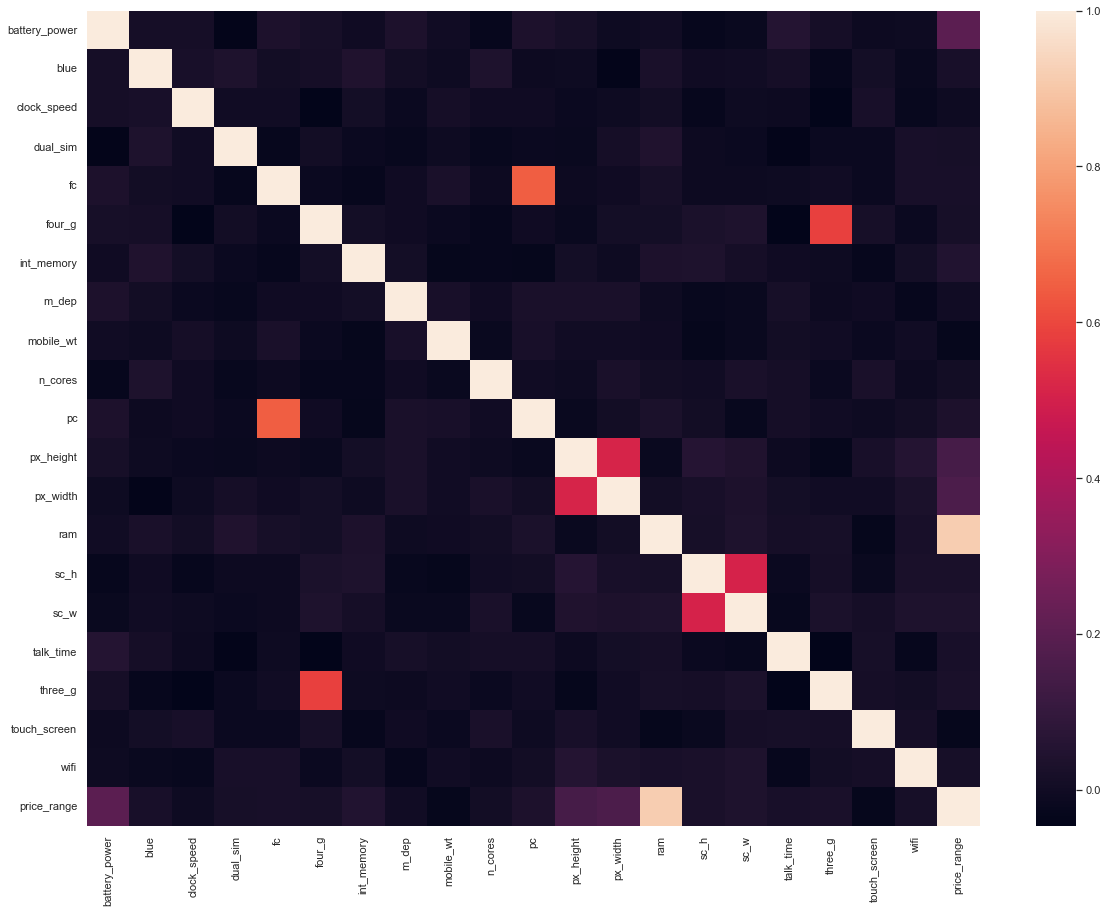

In [9]:
corr = mp.corr()
sns.set_theme(style = 'white', rc = {'figure.figsize' : (20, 15)})
sns.heatmap(corr)

### Analiza zmiennych ciągłych

Text(0.5, 1.0, 'Liczba rdzeni procesora w zależności od ceny urządzenia')

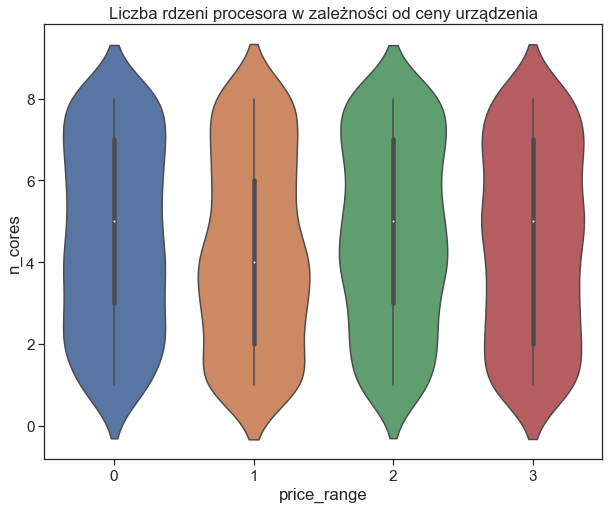

In [34]:
sns.set_theme(style = 'ticks', rc = {'figure.figsize' : (10, 8)}, font_scale=1.4)
sns.violinplot(x = 'price_range', data = mp, y = 'n_cores').set_title('Liczba rdzeni procesora w zależności od ceny urządzenia')

Text(0.5, 1.0, 'Maksymalny czas trwania rozmowy w zależności od ceny urządzenia')

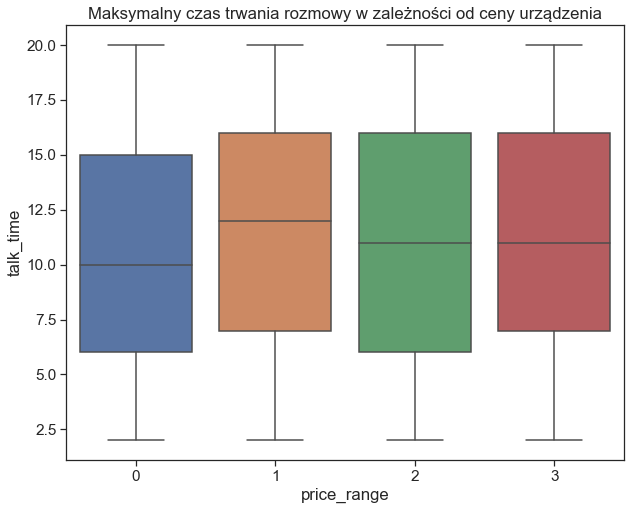

In [35]:
sns.boxplot(x = 'price_range', data = mp, y = 'talk_time').set_title('Maksymalny czas trwania rozmowy w zależności od ceny urządzenia')

Text(0.5, 1.0, 'Wysokość rozdzielczości pikseli w zależności od ceny urządzenia')

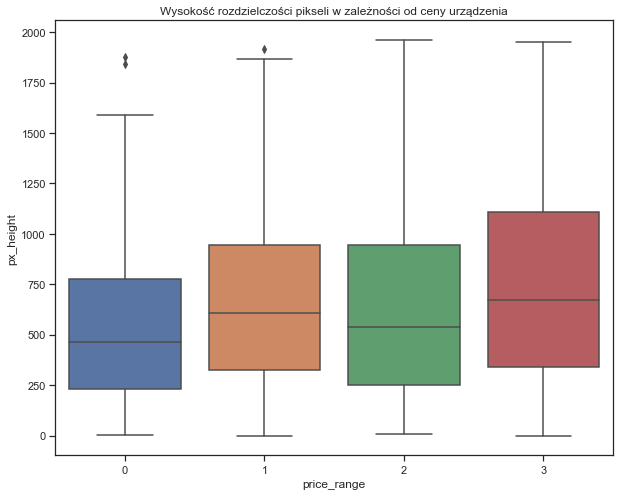

In [12]:
sns.boxplot(x = 'price_range', data = mp, y = 'px_height').set_title('Wysokość rozdzielczości pikseli w zależności od ceny urządzenia')

Text(0.5, 1.0, 'Szerokość rozdzielczości pikseli w zależności od ceny urządzenia')

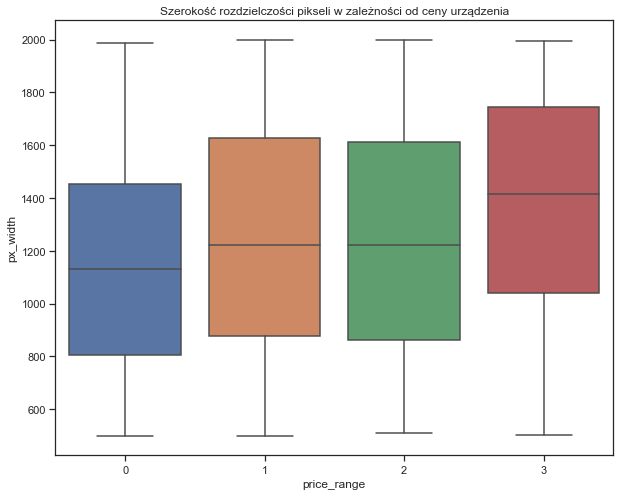

In [13]:
sns.boxplot(x = 'price_range', data = mp, y = 'px_width').set_title('Szerokość rozdzielczości pikseli w zależności od ceny urządzenia')

Text(0.5, 1.0, 'Ilość pamięci ram w zależności od ceny urządzenia')

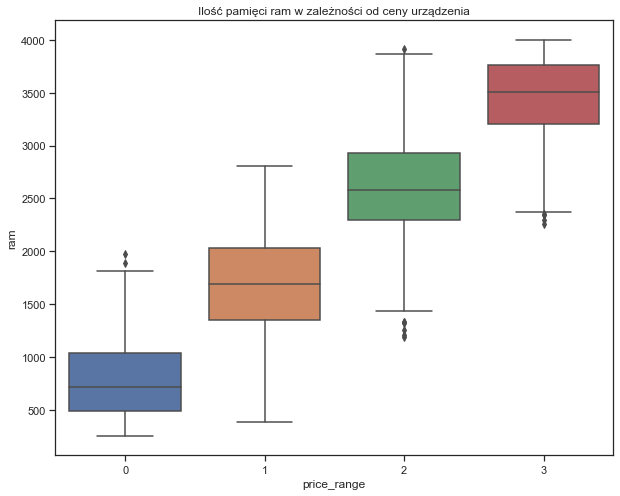

In [14]:
sns.boxplot(x = 'price_range', data = mp, y = 'ram').set_title('Ilość pamięci ram w zależności od ceny urządzenia')

### Analiza zmiennych binarnych

Text(0.5, 1.0, 'Ilość urządzeń posiadających technologię bluetooth w poszczególnych przediałach cenowych')

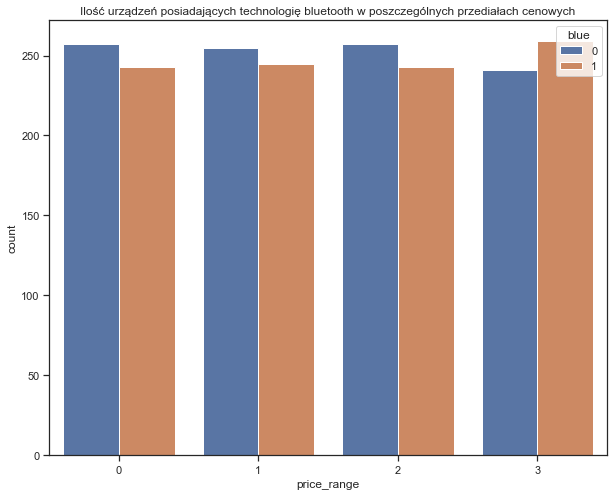

In [15]:
sns.countplot(x='price_range', hue='blue', data=mp).set_title('Ilość urządzeń posiadających technologię bluetooth w poszczególnych przediałach cenowych')

Text(0.5, 1.0, 'Ilość urządzeń posiadających technologię 4g w poszczególnych przediałach cenowych')

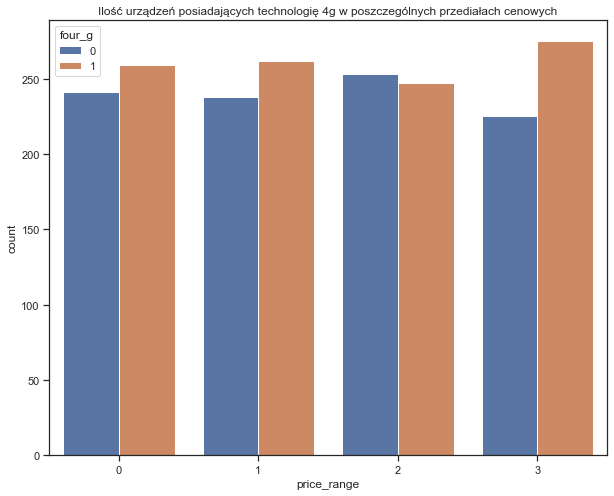

In [16]:
sns.countplot(x='price_range', hue='four_g', data=mp).set_title('Ilość urządzeń posiadających technologię 4g w poszczególnych przediałach cenowych')

Text(0.5, 1.0, 'Ilość urządzeń posiadających technologię 3g w poszczególnych przediałach cenowych')

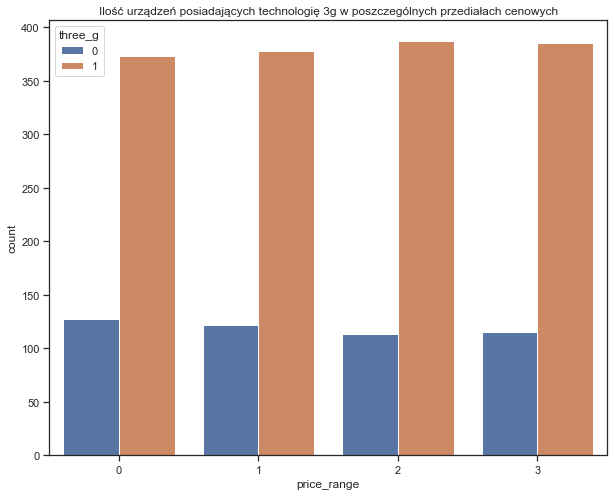

In [17]:
sns.countplot(x='price_range', hue='three_g', data=mp).set_title('Ilość urządzeń posiadających technologię 3g w poszczególnych przediałach cenowych')

Text(0.5, 1.0, 'Ilość urządzeń posiadających technologię wifi w poszczególnych przediałach cenowych')

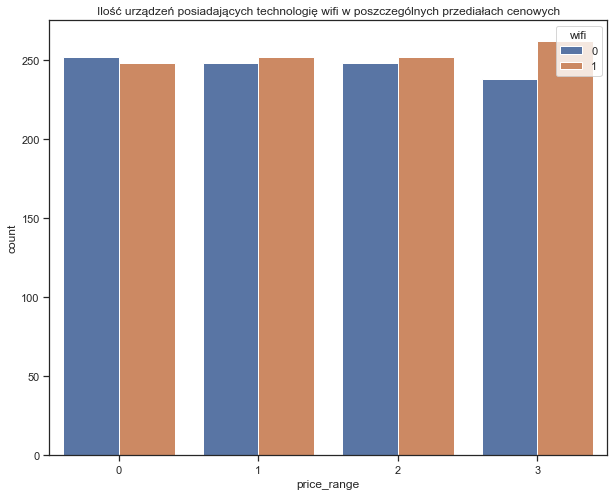

In [18]:
sns.countplot(x='price_range', hue='wifi', data=mp).set_title('Ilość urządzeń posiadających technologię wifi w poszczególnych przediałach cenowych')

Text(0.5, 1.0, 'Ilość urządzeń posiadających technologię dual_sim w poszczególnych przediałach cenowych')

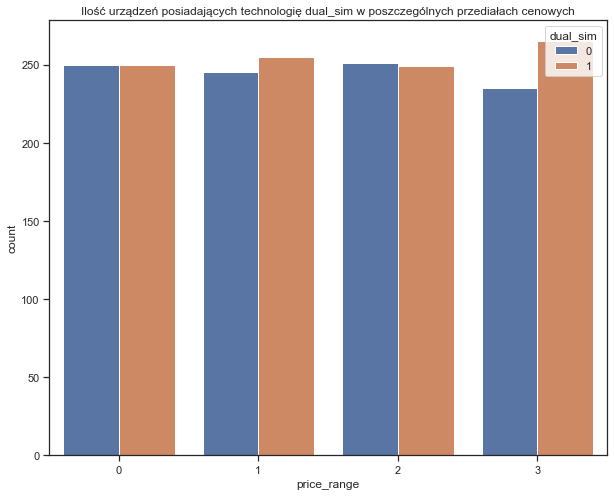

In [19]:
sns.countplot(x='price_range', hue='dual_sim', data=mp).set_title('Ilość urządzeń posiadających technologię dual_sim w poszczególnych przediałach cenowych')

Text(0.5, 1.0, 'Ilość urządzeń posiadających dotykowy ekran w poszczególnych przediałach cenowych')

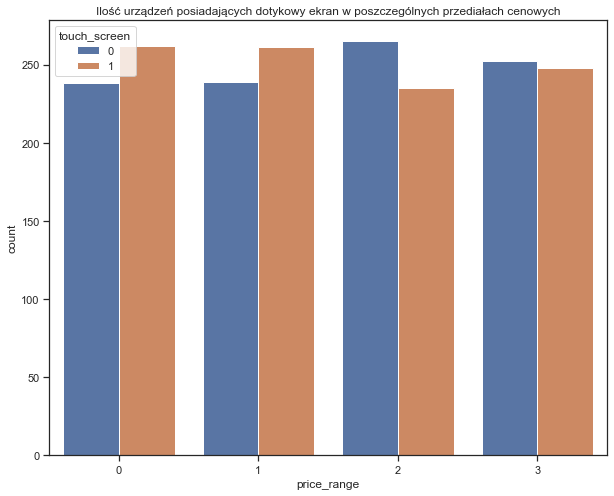

In [20]:
sns.countplot(x='price_range', hue='touch_screen', data=mp).set_title('Ilość urządzeń posiadających dotykowy ekran w poszczególnych przediałach cenowych')

### Badanie zależności pomiędzy różnymi zmiennymi

Text(0.5, 1.0, 'Zależność pomiędzy pionową ilością pikseli a poziomą')

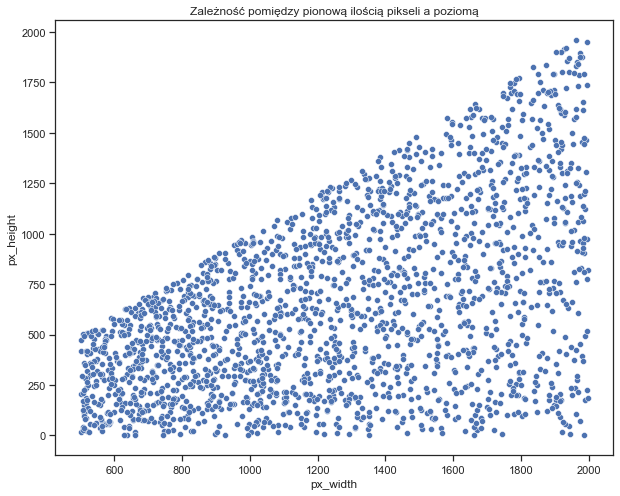

In [21]:
sns.scatterplot(x='px_width', y='px_height', data=mp).set_title('Zależność pomiędzy pionową ilością pikseli a poziomą')

Text(0.5, 1.0, 'Zależność pomiędzy pojemnością baterii a czasem rozmowy')

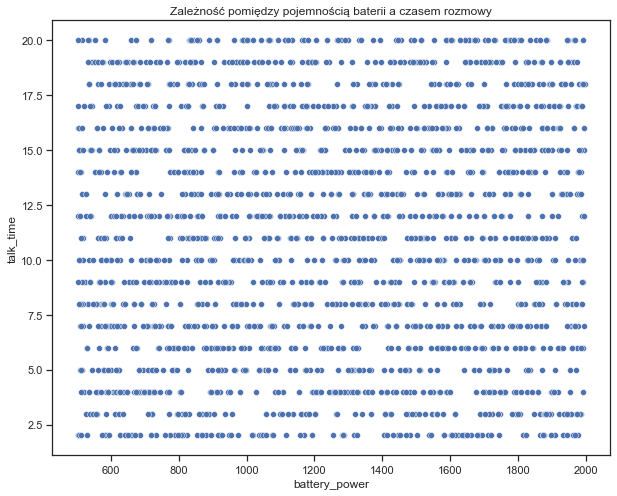

In [22]:
sns.scatterplot(x='battery_power', y='talk_time', data=mp).set_title('Zależność pomiędzy pojemnością baterii a czasem rozmowy')

### Analiza rozkładu empirycznego

#### Analiza zmiennych objaśniających

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


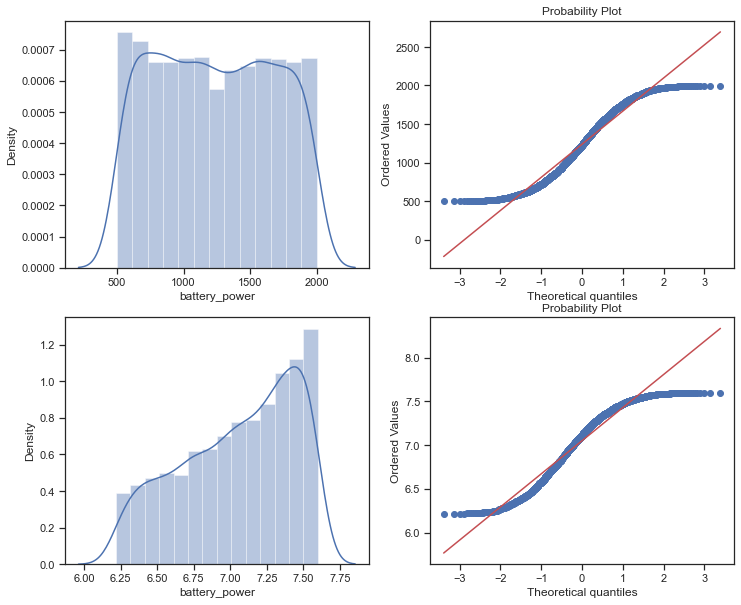

In [23]:
import scipy.stats as stats

fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)

sns.distplot(mp['battery_power'], ax = axes[0, 0])
stats.probplot(mp['battery_power'], plot = axes[0, 1]);
sns.distplot(np.log(mp['battery_power']), ax = axes[1, 0])
stats.probplot(np.log(mp['battery_power']), plot = axes[1, 1]);

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


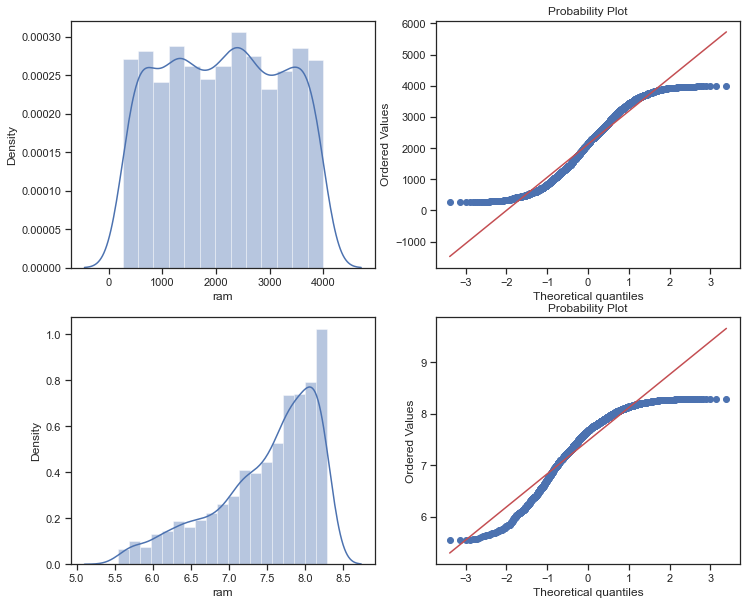

In [24]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)

sns.distplot(mp['ram'], ax = axes[0, 0])
stats.probplot(mp['ram'], plot = axes[0, 1]);
sns.distplot(np.log(mp['ram']), ax = axes[1, 0])
stats.probplot(np.log(mp['ram']), plot = axes[1, 1]);

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


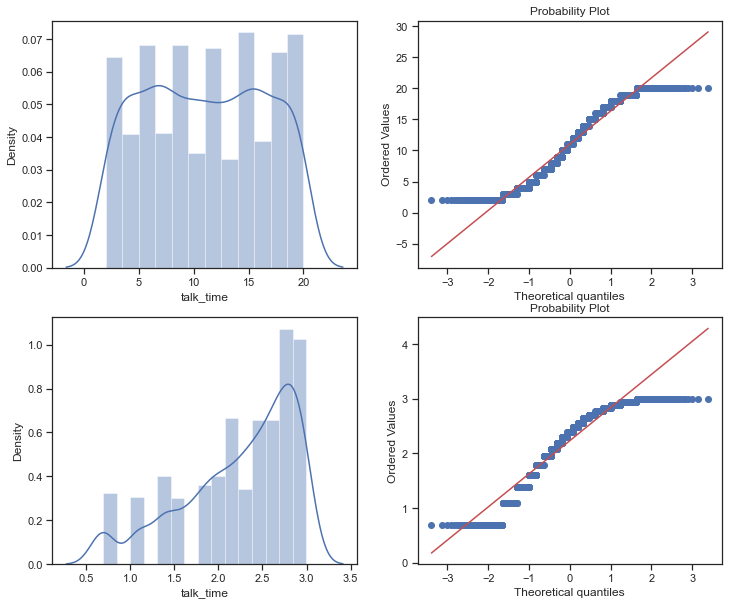

In [25]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)

sns.distplot(mp['talk_time'], ax = axes[0, 0])
stats.probplot(mp['talk_time'], plot = axes[0, 1]);
sns.distplot(np.log(mp['talk_time']), ax = axes[1, 0])
stats.probplot(np.log(mp['talk_time']), plot = axes[1, 1]);

#### Analiza zmiennej objaśnianej

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


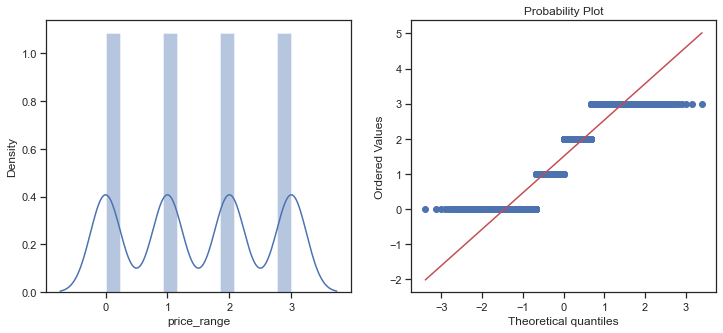

In [26]:
fig,axes = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(12, 5)

sns.distplot(mp['price_range'], ax = axes[0])
stats.probplot(mp['price_range'], plot = axes[1]);

In [27]:
X = mp.drop('price_range', axis=1)
y = mp['price_range']

### Zaproponowanie prostych modeli ml

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 20), (600, 20), (1400,), (600,))

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9189040093522448

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8316666666666667

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.89

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.945713246829651